<a href="https://colab.research.google.com/github/aradyzah/Analisis-Pengguna-Shopee-pada-Platform-X/blob/main/AnalisisSentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn nltk Sastrawi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive


 2_B.gslides
'A WAY OUT (w ibay)'
 Classroom
'CLIPS (punya ak)'
'Colab Notebooks'
'D121231029_C8_Zahrah Adyzah'
 D121231029_Nomor4dan5
'D121231029_ZAHRAH ADYZAH'
'D121231029_Zahrah Adyzah_IMK'
'D121231029_Zahrah Adyzah_Tugas 5'
'D121231029_Zahrah Adyzah_TugasEdxProbstat'
'drive bersama'
 Final_BasisData
 Konversi_suhu_Zahrah_Adyzah.dart
'LAPORAN PEMSIM ANTRIAN.gdoc'
'LIST PET.gsheet'
 lv_0_20250702202625.mp4
'mesin turing'
'Probstat Zahrah Adyzah'
'QUIZ GAME 5-10.gdoc'
'Salinan dari EVENT SCHEDULE RITECH DAY1.docx'
'Salinan dari shopee_januari05.gsheet'
'shopee 01 03-05.gsheet'
 shopee_cleaned.csv
 shopee_januari05.gsheet
'SKRIPSI 1.gdoc'
'SOUND RITECH.gsheet'
 sugar_spice.txt
 tugas_GA1
 tugas_GA2
'TUGAS JARKOM 15 04 2025'
'TUGAS PACKET TRACER'
'uas dpk zahrah adyzah'


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/shopee_cleaned.csv')
df.head()


,conversation_id_str,created_at,favorite_count,full_text,id_str,in_reply_to_screen_name,retweet_count,user_id_str,username,cleaned_text
0,"1,8746E+18",Wed Jan 01 23:44:08 +0000 2025,0,Beli disini https://t.co/bcPufgJ5fH https://t....,"1,8746E+18",NaN,0,"1,31745E+18",NaN,beli disini
1,"1,8746E+18",Wed Jan 01 23:43:52 +0000 2025,0,Cek TERATU BEAUTY 15 gr Matte Blur Set Translu...,"1,8746E+18",NaN,0,"1,79745E+18",NaN,cek teratu beauty matte blur set translucent l...
2,"1,8746E+18",Wed Jan 01 23:43:18 +0000 2025,0,Cek normal&amp;minus[-1.00s/d~-8.00] Beauty Le...,"1,8746E+18",NaN,0,"1,79745E+18",NaN,cek normal amp minus beauty lens softlens hija...
3,"1,8746E+18",Wed Jan 01 23:41:29 +0000 2025,0,55k . Beli disini https://t.co/cbdIDAEcqO http...,"1,8746E+18",NaN,0,"1,31745E+18",NaN,beli disini
4,"1,87459E+18",Wed Jan 01 23:41:13 +0000 2025,0,@basebuku Ku jual murah aja guys lg BU link di...,"1,8746E+18",basebuku,0,313095201,NaN,jual murah aja guys link bio tanya kondisi buk...


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/15rIYJznwP5tBPbAlPzgc0jBC5gj2qUXB8HVY-SWVh0s/edit#gid=0


In [ ]:
!ls /content/drive/MyDrive

 2_B.gslides
'A WAY OUT (w ibay)'
 Classroom
'CLIPS (punya ak)'
'Colab Notebooks'
'D121231029_C8_Zahrah Adyzah'
 D121231029_Nomor4dan5
'D121231029_ZAHRAH ADYZAH'
'D121231029_Zahrah Adyzah_IMK'
'D121231029_Zahrah Adyzah_Tugas 5'
'D121231029_Zahrah Adyzah_TugasEdxProbstat'
'drive bersama'
 Final_BasisData
 InteractiveSheet_2025-11-06_10_25_52.gsheet
 Konversi_suhu_Zahrah_Adyzah.dart
'LAPORAN PEMSIM ANTRIAN.gdoc'
'LIST PET.gsheet'
 lv_0_20250702202625.mp4
'mesin turing'
'Probstat Zahrah Adyzah'
'QUIZ GAME 5-10.gdoc'
'Salinan dari EVENT SCHEDULE RITECH DAY1.docx'
'Salinan dari shopee_januari05.gsheet'
'shopee 01 03-05.gsheet'
 shopee_cleaned.csv
 shopee_cleaned.gsheet
 shopee_januari05.gsheet
'SKRIPSI 1.gdoc'
'SOUND RITECH.gsheet'
 sugar_spice.txt
 tugas_GA1
 tugas_GA2
'TUGAS JARKOM 15 04 2025'
'TUGAS PACKET TRACER'
'uas dpk zahrah adyzah'


In [ ]:
import pandas as pd

# Baca dataset hasil preprocessing
df = pd.read_csv('/content/drive/MyDrive/shopee_cleaned.csv')

# Ambil 200 tweet pertama untuk dilabeli manual
df_sample = df.head(200)

# Tambahkan kolom kosong 'sentiment'
df_sample['sentiment'] = ''

# Simpan ke file baru untuk dilabel manual di Google Sheets atau Excel
output_path = '/content/drive/MyDrive/tweets_for_labeling.csv'
df_sample.to_csv(output_path, index=False)
print(f"✅ File untuk pelabelan disimpan di: {output_path}")


✅ File untuk pelabelan disimpan di: /content/drive/MyDrive/tweets_for_labeling.csv


/tmp/ipython-input-1893739886.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['sentiment'] = ''


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Baca file yang sudah dilabel
df_labeled = pd.read_csv('/content/drive/MyDrive/tweets_for_labeling - tweets_for_labeling.csv')

print(df_labeled.columns)
df_labeled.head()


Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'in_reply_to_screen_name', 'retweet_count', 'user_id_str',
       'username', 'cleaned_text', 'sentiment'],
      dtype='object')


,conversation_id_str,created_at,favorite_count,full_text,id_str,in_reply_to_screen_name,retweet_count,user_id_str,username,cleaned_text,sentiment
0,"1,87E+18",Wed Jan 01 23:44:08 +0000 2025,0,Beli disini https://t.co/bcPufgJ5fH https://t....,"1,87E+18",NaN,0,"1,32E+18",NaN,beli disini,netral
1,"1,87E+18",Wed Jan 01 23:43:52 +0000 2025,0,Cek TERATU BEAUTY 15 gr Matte Blur Set Translu...,"1,87E+18",NaN,0,"1,80E+18",NaN,cek teratu beauty matte blur set translucent l...,netral
2,"1,87E+18",Wed Jan 01 23:43:18 +0000 2025,0,Cek normal&amp;minus[-1.00s/d~-8.00] Beauty Le...,"1,87E+18",NaN,0,"1,80E+18",NaN,cek normal amp minus beauty lens softlens hija...,netral
3,"1,87E+18",Wed Jan 01 23:41:29 +0000 2025,0,55k . Beli disini https://t.co/cbdIDAEcqO http...,"1,87E+18",NaN,0,"1,32E+18",NaN,beli disini,netral
4,"1,87E+18",Wed Jan 01 23:41:13 +0000 2025,0,@basebuku Ku jual murah aja guys lg BU link di...,"1,87E+18",basebuku,0,313095201,NaN,jual murah aja guys link bio tanya kondisi buk...,netral


In [ ]:
df_labeled.shape


(200, 11)

In [ ]:
df_labeled.head()


,conversation_id_str,created_at,favorite_count,full_text,id_str,in_reply_to_screen_name,retweet_count,user_id_str,username,cleaned_text,sentiment
0,"1,87E+18",Wed Jan 01 23:44:08 +0000 2025,0,Beli disini https://t.co/bcPufgJ5fH https://t....,"1,87E+18",NaN,0,"1,32E+18",NaN,beli disini,netral
1,"1,87E+18",Wed Jan 01 23:43:52 +0000 2025,0,Cek TERATU BEAUTY 15 gr Matte Blur Set Translu...,"1,87E+18",NaN,0,"1,80E+18",NaN,cek teratu beauty matte blur set translucent l...,netral
2,"1,87E+18",Wed Jan 01 23:43:18 +0000 2025,0,Cek normal&amp;minus[-1.00s/d~-8.00] Beauty Le...,"1,87E+18",NaN,0,"1,80E+18",NaN,cek normal amp minus beauty lens softlens hija...,netral
3,"1,87E+18",Wed Jan 01 23:41:29 +0000 2025,0,55k . Beli disini https://t.co/cbdIDAEcqO http...,"1,87E+18",NaN,0,"1,32E+18",NaN,beli disini,netral
4,"1,87E+18",Wed Jan 01 23:41:13 +0000 2025,0,@basebuku Ku jual murah aja guys lg BU link di...,"1,87E+18",basebuku,0,313095201,NaN,jual murah aja guys link bio tanya kondisi buk...,netral


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Pastikan tidak ada data kosong
df_labeled = df_labeled.dropna(subset=['cleaned_text', 'sentiment'])

# Pisahkan data latih dan uji
X = df_labeled['cleaned_text']
y = df_labeled['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ubah teks jadi TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Latih model Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Evaluasi
y_pred = model.predict(X_test_tfidf)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.775

Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         3
      netral       0.78      1.00      0.87        31
     positif       0.00      0.00      0.00         5
    positiff       0.00      0.00      0.00         1

    accuracy                           0.78        40
   macro avg       0.19      0.25      0.22        40
weighted avg       0.60      0.78      0.68        40



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/shopee_cleaned_sentiment.csv')
X_all = vectorizer.transform(df_all['cleaned_text'])
df_all['predicted_sentiment'] = model.predict(X_all)

# Simpan hasil akhir
df_all.to_csv('/content/drive/MyDrive/tweets_with_predicted_sentiment.csv', index=False)
print("✅ Hasil akhir tersimpan di: /content/drive/MyDrive/tweets_with_predicted_sentiment.csv")

✅ Hasil akhir tersimpan di: /content/drive/MyDrive/tweets_with_predicted_sentiment.csv


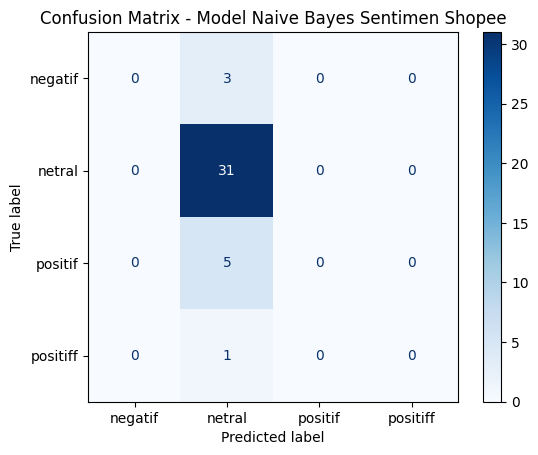

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test, cmap='Blues')
plt.title("Confusion Matrix - Model Naive Bayes Sentimen Shopee")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi data uji
y_pred = model.predict(X_test_tfidf)

# 1️⃣ Akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

# 2️⃣ Laporan lengkap: precision, recall, f1-score per kelas
print("\nLaporan Klasifikasi:\n")
print(classification_report(y_test, y_pred))

# 3️⃣ (Opsional) Confusion matrix untuk visualisasi
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Akurasi: 0.775

Laporan Klasifikasi:

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         3
      netral       0.78      1.00      0.87        31
     positif       0.00      0.00      0.00         5
    positiff       0.00      0.00      0.00         1

    accuracy                           0.78        40
   macro avg       0.19      0.25      0.22        40
weighted avg       0.60      0.78      0.68        40


Confusion Matrix:
 [[ 0  3  0  0]
 [ 0 31  0  0]
 [ 0  5  0  0]
 [ 0  1  0  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
